In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

N = 10
T = np.arange(1, 10, 0.1)
J = 1

In [9]:
def sim(spin, t):
    for i in range(N):
        chosen = random.randint(0, N-1)
        cost = spin[chosen]*(spin[(chosen-1)%N]+spin[(chosen+1)%N])
        if cost < 0:
            spin[chosen] *= -1
        elif np.random.rand() < np.exp(-cost/t):
            spin[chosen] *= -1


In [10]:
def energy(spin):
    E = 0
    for i in range(N):
        E += -J*spin[(i+1)%N]*spin[i]
    return E/N

def magnetization(spin):
    return sum(spin)/N

In [11]:
E = []
M = []

for t in T:
    e = 0
    m = 0
    spin = np.random.choice([-1, 1], size=N)
    for i in range(1000):
        sim(spin, t)
        e += energy(spin)
        m += magnetization(spin)
    e /= 1000
    m /= 1000
    E.append(e)
    M.append(m)

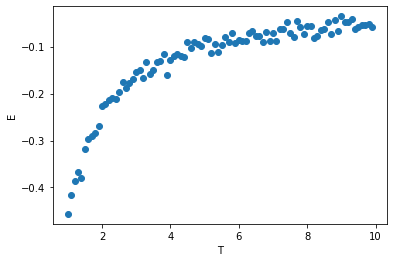

In [12]:
plt.scatter(T, E)
plt.xlabel("T")
plt.ylabel("E")
plt.show()


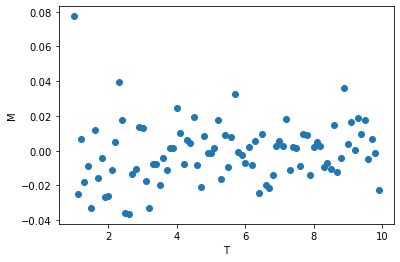

In [13]:
plt.scatter(T, M)
plt.xlabel("T")
plt.ylabel("M")
plt.show()